In [1]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

In [ ]:
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, Flatten, AvgPool2D, Dense

----------------
DataSet preprocessing

In [2]:
(train_X, train_y), (test_X, test_y) = keras.datasets.mnist.load_data()

In [3]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
train_X = train_X.reshape((60000, 28, 28, 1))
test_X = test_X.reshape((10000, 28, 28, 1))

In [5]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


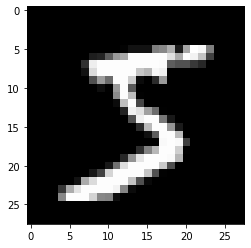

In [6]:
plt.imshow(train_X[0], cmap='gray')

In [7]:
train_y[0]

5

------------------------------
LeNet

In [3]:
LeNet = models.Sequential([
    Conv2D(filters=6, kernel_size=5, strides=1, activation="tanh",
           input_shape=(28,28,1), padding="same"),
    AvgPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=16, kernel_size=5, strides=1, activation="tanh"),
    AvgPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=120, kernel_size=5, strides=1, activation="tanh"),
    Flatten(),
    Dense(84, activation="tanh"),
    Dense(10, activation="softmax"),
])

2022-06-23 11:49:00.622678: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-23 11:49:00.992574: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5449 MB memory:  -> device: 0, name: GeForce RTX 3070, pci bus id: 0000:01:00.0, compute capability: 8.6


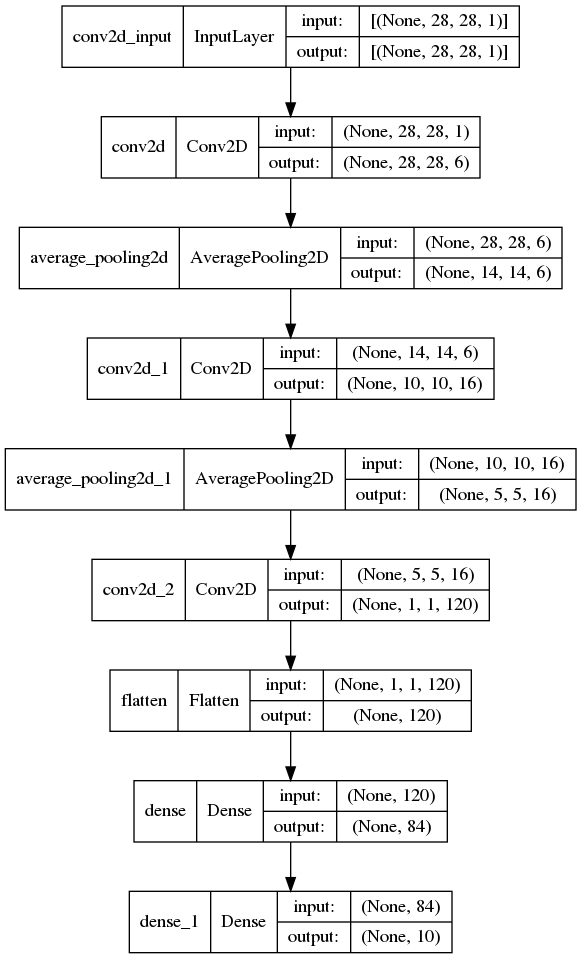

In [4]:
tf.keras.utils.plot_model(LeNet, show_shapes=True)

In [10]:
LeNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [11]:
LeNet.compile(
    optimizer = keras.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [12]:
LeNet.fit(
    x=train_X, y=train_y, epochs=10,
)

Epoch 1/10


2022-06-23 11:42:06.070174: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2022-06-23 11:42:07.356816: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1875/1875 [==============================] - 10s 4ms/step - loss: 0.1592 - accuracy: 0.9525
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0661 - accuracy: 0.9793
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0504 - accuracy: 0.9844
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0425 - accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0335 - accuracy: 0.9893
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0294 - accuracy: 0.9903
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0278 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0241 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0215 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0175 - accura

In [13]:
test_loss, test_acc = LeNet.evaluate(test_X,  test_y, verbose=2)

313/313 - 1s - loss: 0.0432 - accuracy: 0.9869 - 632ms/epoch - 2ms/step


--------------------
LeNet + normalize

In [14]:
train_X = train_X/255.0
test_X = test_X/255.0

In [15]:
LeNet_normalize = models.Sequential([
    Conv2D(filters=6, kernel_size=5, strides=1, activation="tanh",
           input_shape=(28,28,1), padding="same"),
    AvgPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=16, kernel_size=5, strides=1, activation="tanh"),
    AvgPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=120, kernel_size=5, strides=1, activation="tanh"),
    Flatten(),
    Dense(84, activation="tanh"),
    Dense(10, activation="softmax"),
])

In [16]:
LeNet_normalize.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 120)              

In [17]:
LeNet_normalize.compile(
    optimizer = keras.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [18]:
LeNet_normalize.fit(
    x=train_X, y=train_y, epochs=10,
)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2288 - accuracy: 0.9309
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0864 - accuracy: 0.9728
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0601 - accuracy: 0.9816
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0442 - accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0365 - accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0323 - accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0272 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0212 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0196 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.018

In [19]:
test_loss, test_acc = LeNet_normalize.evaluate(test_X,  test_y, verbose=2)

313/313 - 1s - loss: 0.0496 - accuracy: 0.9853 - 693ms/epoch - 2ms/step
